In [ ]:
from fastcore.all import *
from fastai.vision.all import *
from fastai.vision.widgets import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Librariries for Pytorch Mobile conversion
import torch
import torchvision
from torch.utils.mobile_optimizer import optimize_for_mobile

import warnings
warnings.filterwarnings("ignore")

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.current_device()

0

In [4]:
path = Path('movement_database')

watches = DataBlock(
                blocks=(ImageBlock, CategoryBlock), 
                get_items=get_image_files, 
                splitter=RandomSplitter(valid_pct=0.2, seed=42),
                get_y=parent_label)

watches=watches.new(item_tfms=Resize(256, 
                                     method='squish'),
                    batch_tfms=aug_transforms(do_flip=False, 
                                              max_rotate=45.))

dls=watches.dataloaders(path, bs=8) #batch size set to 8 to prevent GPU memory allocation error

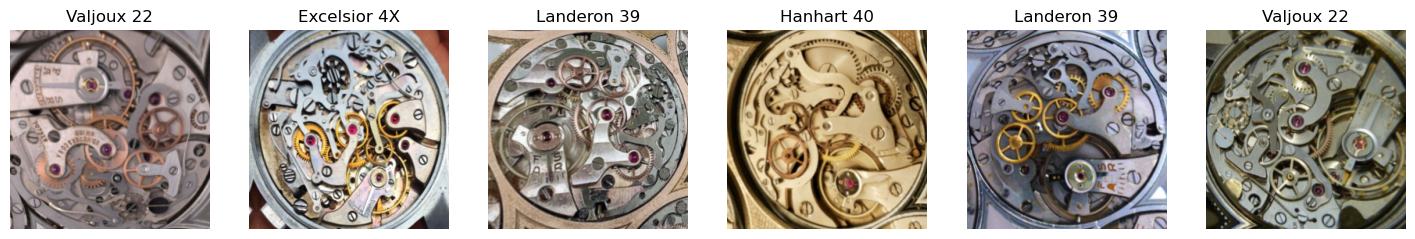

In [5]:
dls.show_batch(max_n=6, nrows=1)

In [6]:
learn = vision_learner(dls, resnet152, metrics=accuracy)
learn.fine_tune(30)

In [7]:
learn.save('model_20022023')

Path('models/model_20022023.pth')

In [ ]:
#model = load_learner('model_1002023.pkl')

## Model interpretation

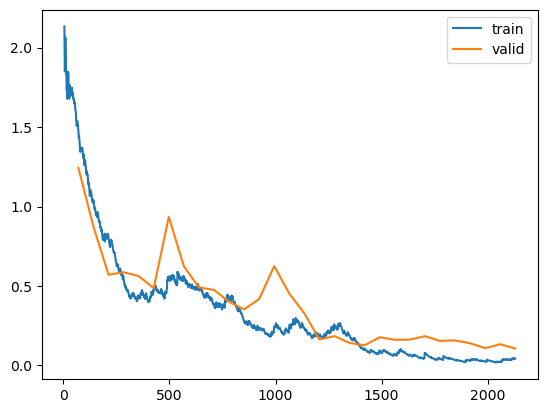

In [8]:
learn.recorder.plot_loss()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

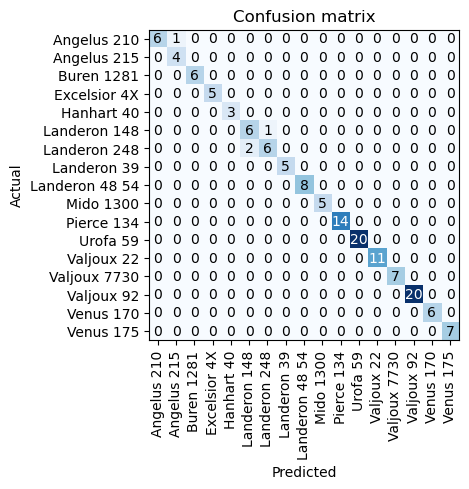

In [ ]:
interp.plot_confusion_matrix()

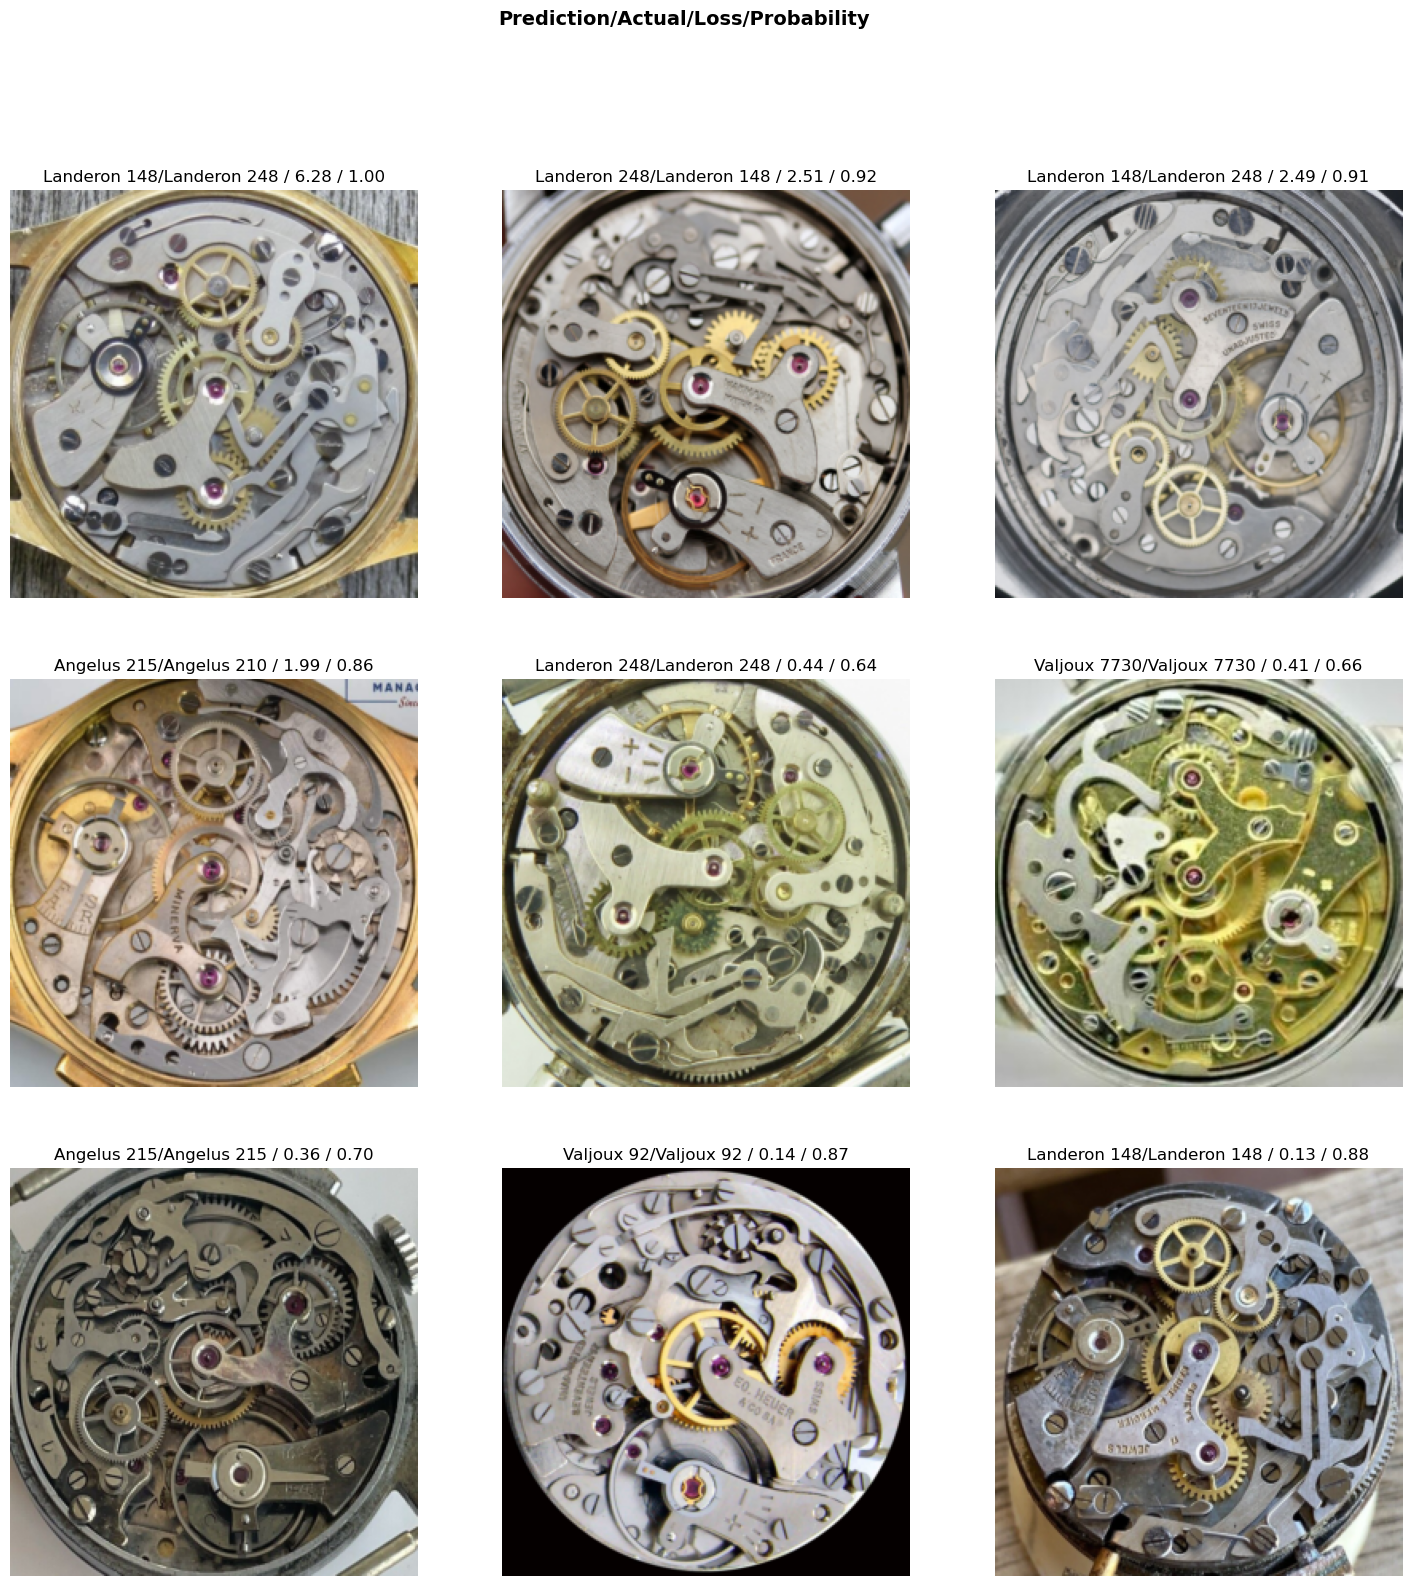

In [ ]:
interp.plot_top_losses(9, nrows=3, figsize=(18,18))

## Data set cleaning (if necessary)

In [10]:
cleaner = ImageClassifierCleaner(learn)

In [11]:
cleaner

## Export model to Pytorch Mobile

In [ ]:
example = torch.rand(1, 3, 224, 224)
traced_script_module = torch.jit.trace(model.forward, example)
traced_script_module_optimized = optimize_for_mobile(traced_script_module)
traced_script_module_optimized._save_for_lite_interpreter("model.ptl")

# Test

In [13]:
mov,_,probs = learn.predict(PILImage.create('test_image.jpg'))
im = Image.open('test_image.jpg')

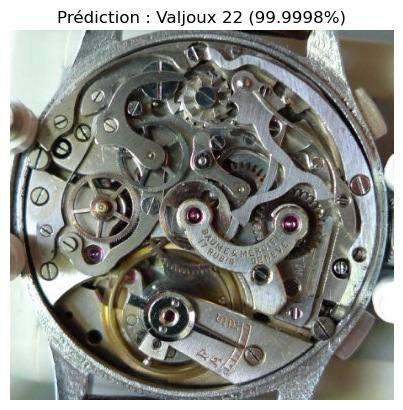

In [14]:
plt.imshow(im)
plt.title('Prédiction : {} ({:.4f}%)'.format(mov, max(probs)*100))
plt.axis('off')
plt.show()